論文  
https://arxiv.org/pdf/2104.07636.pdf  
GitHub  
https://github.com/Janspiry/Image-Super-Resolution-via-Iterative-Refinement  
  
<a href="https://colab.research.google.com/github/kaz12tech/ai_demos/blob/master/sr3_demo.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# カレントディレクトリ確認
!pwd
# GPU確認
!nvidia-smi --query-gpu=gpu_name,driver_version,memory.total --format=csv


/content/Image-Super-Resolution-via-Iterative-Refinement
name, driver_version, memory.total [MiB]
Tesla T4, 550.54.15, 15360 MiB


In [37]:
# SR3のソースコードをGitHubから取得
%cd /content/
!git clone https://github.com/Janspiry/Image-Super-Resolution-via-Iterative-Refinement.git

/content
fatal: destination path 'Image-Super-Resolution-via-Iterative-Refinement' already exists and is not an empty directory.


In [38]:
# ライブラリインストール
!pip install tensorboardx wandb
!pip install lmdb
!pip install --upgrade gdown

# 学習済みモデルをダウンロード

https://drive.google.com/drive/folders/1mCiWhFqHyjt5zE4IdA41fjFwCYdqDzSF  
gdownが失敗した場合は  
上記からI830000_E32_opt.pthとI830000_E32_gen.pthをダウンロードして/content/Image-Super-Resolution-via-Iterative-Refinementに配置  

In [39]:
%cd /content/Image-Super-Resolution-via-Iterative-Refinement/
!gdown --id 1M015uQG8cq0mqwhEfc7klFJwDr2jsYSr
!gdown --id 1Vwe1Raa-Dpop75o5v7O5qvGoOdFDlyc-

/content/Image-Super-Resolution-via-Iterative-Refinement
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1M015uQG8cq0mqwhEfc7klFJwDr2jsYSr
From (redirected): https://drive.google.com/uc?id=1M015uQG8cq0mqwhEfc7klFJwDr2jsYSr&confirm=t&uuid=2aa7bb52-6c41-4922-97da-ef3673ac55e2
To: /content/Image-Super-Resolution-via-Iterative-Refinement/I830000_E32_opt.pth
100% 1.24G/1.24G [00:09<00:00, 130MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Vwe1Raa-Dpop75o5v7O5qvGoOdFDlyc-
From (redirected): https://drive.google.com/uc?id=

In [40]:
# resume_stateにモデルを設定
!sed -i ./config/sr_sr3_64_512.json -e "s/\"resume_state\": null/\"resume_state\": \"I830000_E32\"/g"

In [41]:
# テストデータ用ディレクトリ作成
!mkdir input
%cd "/content/Image-Super-Resolution-via-Iterative-Refinement/input"

# ファイルアップロード
from google.colab import files
uploaded = files.upload()
uploaded = list(uploaded.keys())
print(uploaded)
file_name = uploaded[0]

mkdir: cannot create directory ‘input’: File exists
/content/Image-Super-Resolution-via-Iterative-Refinement/input


Saving resized64_64.png to resized64_64.png
['resized64_64.png']


In [44]:
%cd "/content/Image-Super-Resolution-via-Iterative-Refinement"

# データ準備
!mkdir -p ./dataset/celebahq

# ./dataset/celebahqにdata.mdbとlock.mdbを作成
!python data/prepare_data.py  --path ./input/  --out ./dataset/celebahq --size 64,512

/content/Image-Super-Resolution-via-Iterative-Refinement
0/3 images processedProcess Process-2:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/content/Image-Super-Resolution-via-Iterative-Refinement/data/prepare_data.py", line 72, in prepare_process_worker
    i, imgs = wctx.resize_fn(file)
              ^^^^^^^^^^^^^^^^^^^^
  File "/content/Image-Super-Resolution-via-Iterative-Refinement/data/prepare_data.py", line 43, in resize_worker
    img = Image.open(img_file)
          ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/PIL/Image.py", line 3465, in open
    fp = builtins.open(filename, "rb")
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
IsADirectoryError: [Errno 21] Is a directory: 'input/.ipynb_checkpoints'
Process Process-3:
Traceback (most recent call last

In [45]:
# 超解像実行
!python infer.py -c ./config/sr_sr3_64_512.json

export CUDA_VISIBLE_DEVICES=0,1
25-03-19 12:44:00.503 - INFO:   name: distributed_high_sr_ffhq
  phase: val
  gpu_ids: [0, 1]
  path:[
    log: experiments/distributed_high_sr_ffhq_250319_124400/logs
    tb_logger: experiments/distributed_high_sr_ffhq_250319_124400/tb_logger
    results: experiments/distributed_high_sr_ffhq_250319_124400/results
    checkpoint: experiments/distributed_high_sr_ffhq_250319_124400/checkpoint
    resume_state: I830000_E32
    experiments_root: experiments/distributed_high_sr_ffhq_250319_124400
  ]
  datasets:[
    train:[
      name: FFHQ
      mode: HR
      dataroot: dataset/ffhq_64_512
      datatype: img
      l_resolution: 64
      r_resolution: 512
      batch_size: 2
      num_workers: 8
      use_shuffle: True
      data_len: -1
    ]
    val:[
      name: CelebaHQ
      mode: LRHR
      dataroot: dataset/celebahq_64_512
      datatype: img
      l_resolution: 64
      r_resolution: 512
      data_len: 50
    ]
  ]
  model:[
    which_model_G: sr3


# 超解像の結果を表示

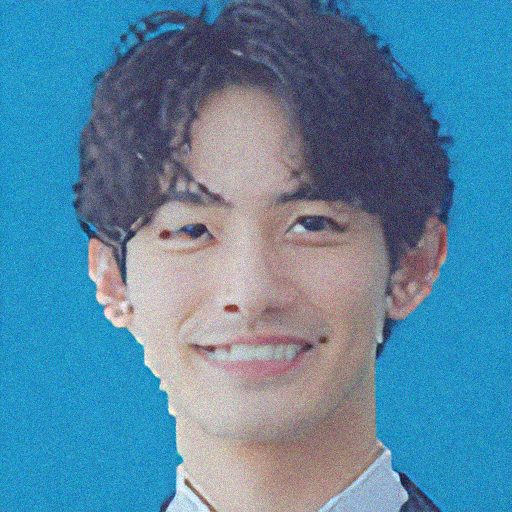

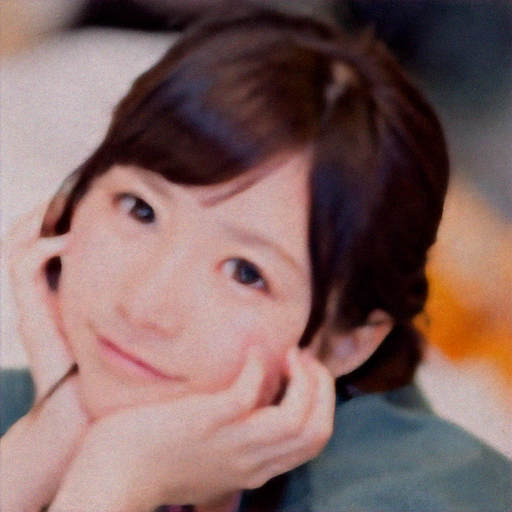

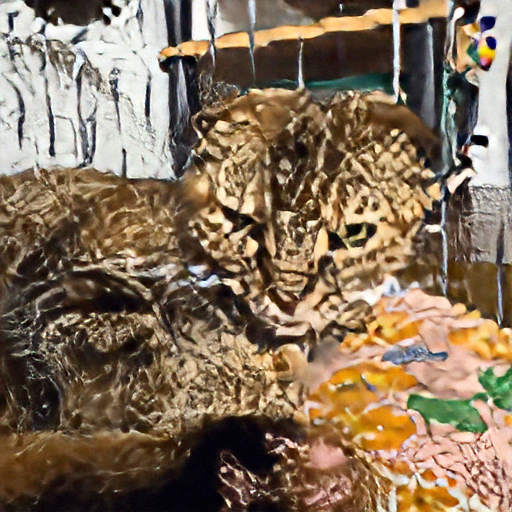

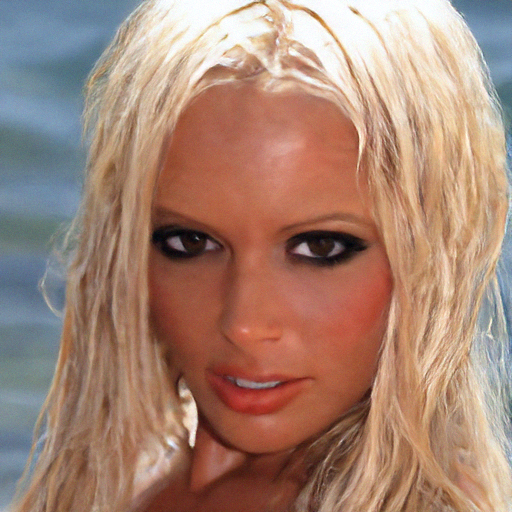

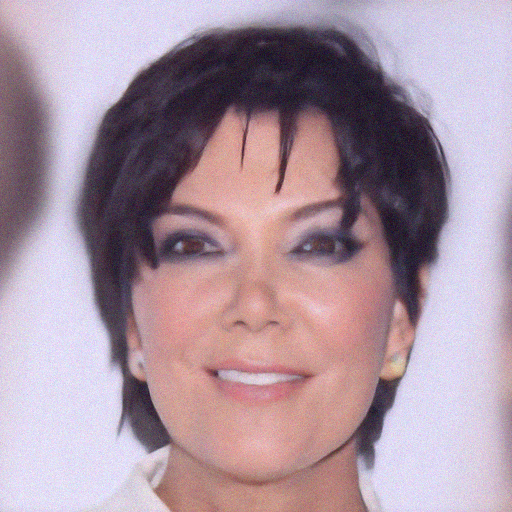

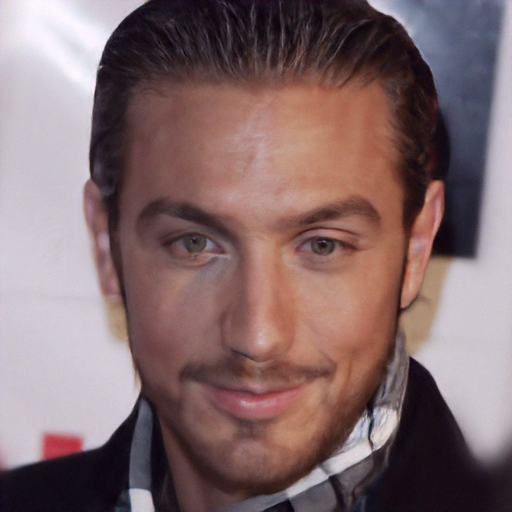

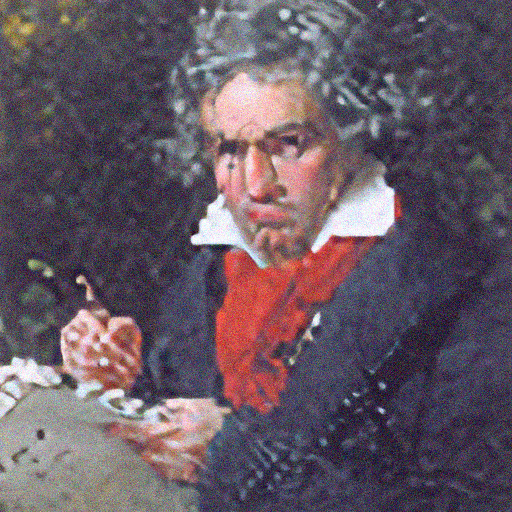

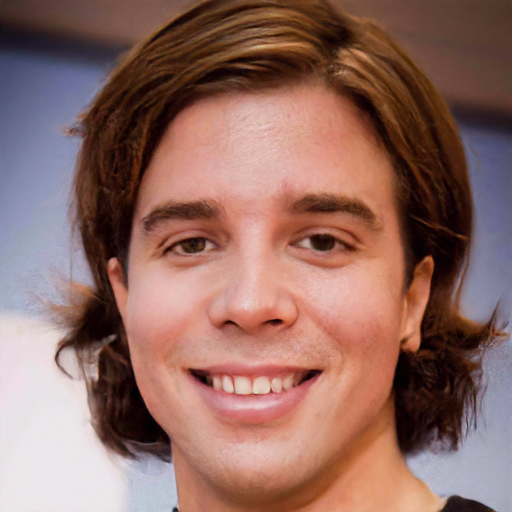

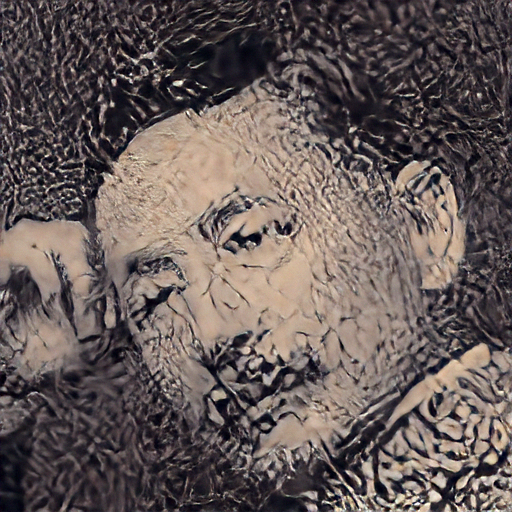

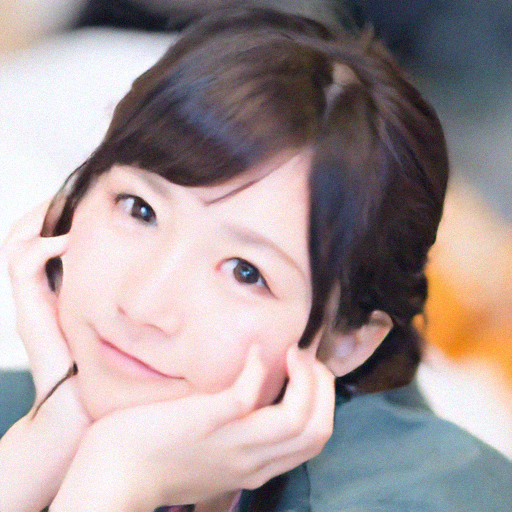

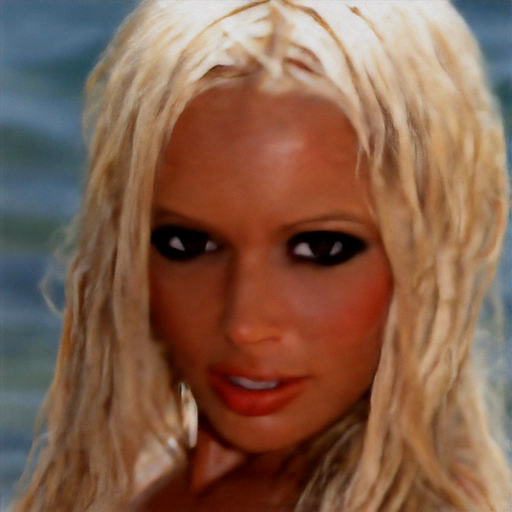

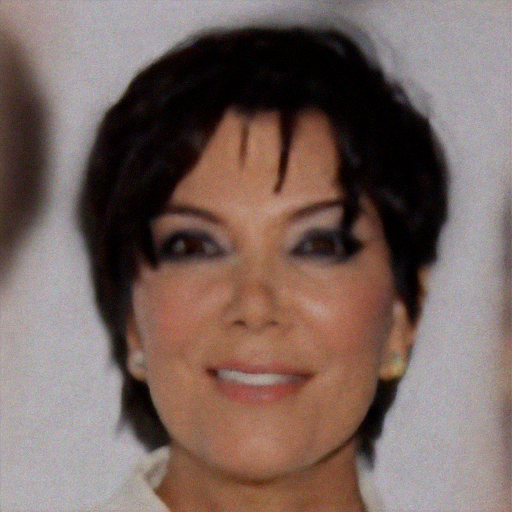

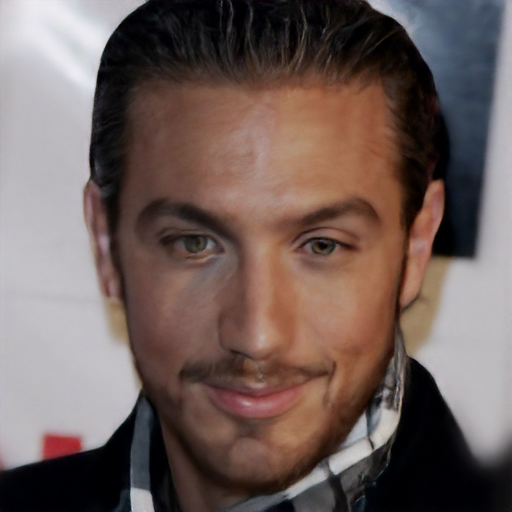

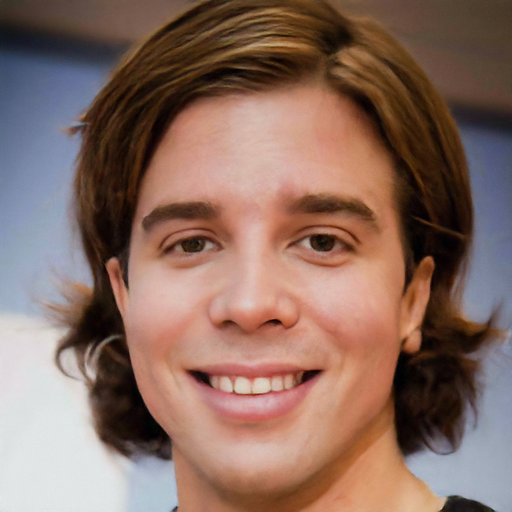

In [46]:
import glob
from IPython.display import Image, display

files = glob.glob("./experiments/*/results/*_sr.png")
for file in files:
  display(Image(file))